In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# 1- Import dataset
pdata = pd.read_csv("OnlineNewsPopularity.csv")

In [8]:
# Remove some extra columns
pdata = pdata.drop(['url',' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04'], axis=1)

In [7]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

In [8]:
pdata.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [9]:
#this represents the encoded category columns
pdata.iloc[:, 12:18]

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0
39640,0.0,0.0,0.0,1.0,0.0,0.0
39641,0.0,0.0,0.0,0.0,0.0,0.0
39642,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
#this represents the encoded day of week columns
pdata.iloc[:, 30:37]

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
39639,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39640,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39641,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39642,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
pdata['weekday'] = (pdata.iloc[:, 30:37] == 1).idxmax(1)
pdata['category'] = (pdata.iloc[:, 12:18] == 1).idxmax(1)

#https://stackoverflow.com/questions/49372640/python-pandas-how-to-reverse-one-hot-encoding-back-to-categorical

In [12]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

In [13]:
#we now have two extra columns
pdata.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,category
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,weekday_is_monday,data_channel_is_entertainment
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,weekday_is_monday,data_channel_is_bus
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,weekday_is_monday,data_channel_is_bus
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,weekday_is_monday,data_channel_is_entertainment
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,weekday_is_monday,data_channel_is_tech


C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


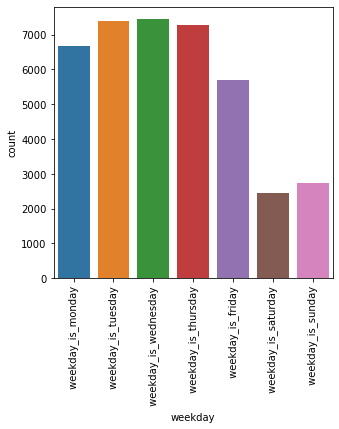

In [14]:
#Looking at the distribution of AgeDays
plt.figure(figsize=(5,5))
sns.countplot(pdata['weekday'])
plt.xticks(rotation=90)
plt.show()

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


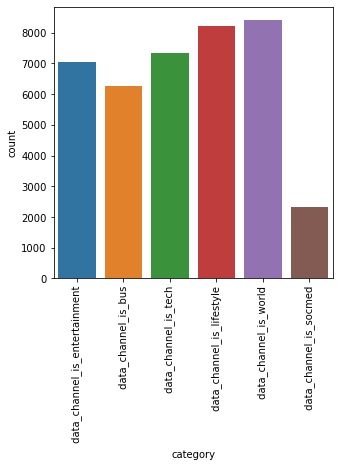

In [15]:
#Looking at the distribution of AgeDays
plt.figure(figsize=(5,5))
sns.countplot(pdata['category'])
plt.xticks(rotation=90)
plt.show()

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


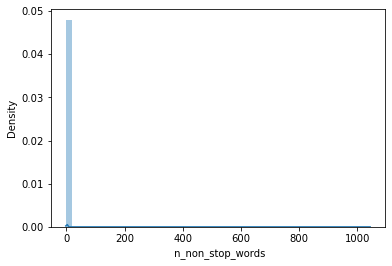

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


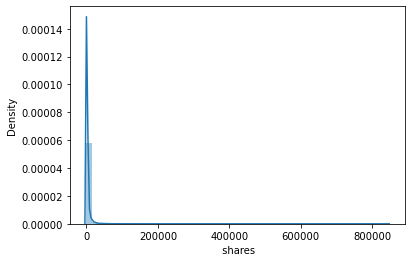

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


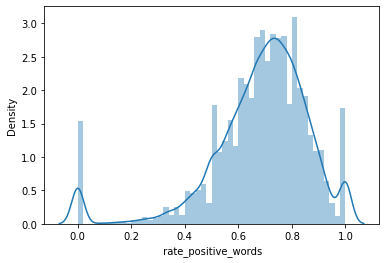

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


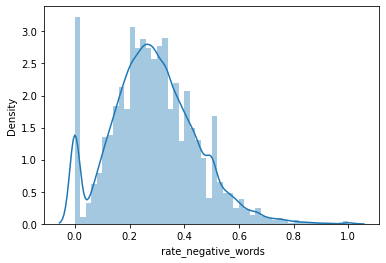

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


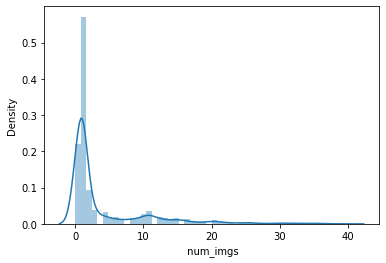

In [36]:
#Looking at tails and distributions of the following continuous values
for i in [' n_non_stop_words',' shares',' rate_positive_words',' rate_negative_words',' num_imgs']:
    sns.distplot(pdata[i])
    plt.show()

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


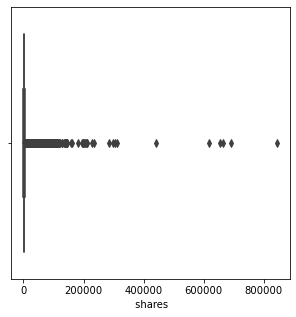

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


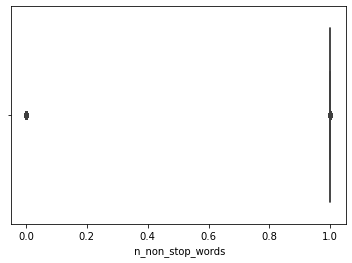

In [49]:
plt.figure(figsize=(5,5))
# distplot for continous columns
for i in [' shares',' n_non_stop_words']:
    sns.boxplot(pdata[i])
    plt.show()

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


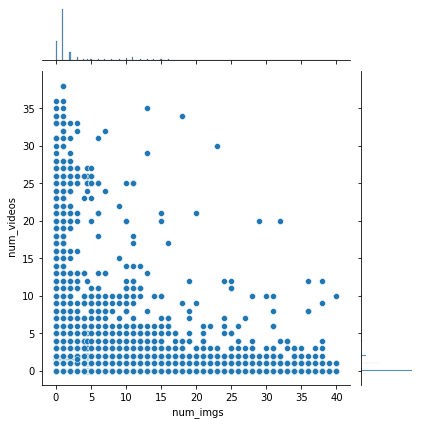

In [38]:
sns.jointplot(pdata[' num_imgs'],pdata[' num_videos']);

In [48]:
z = pdata[pdata[' n_non_stop_words']> 40]
for i in list (z[z[' n_non_stop_words']> 40].index):
    pdata.loc[i,' n_non_stop_words'] = 1
  

In [45]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 31037 to 31037
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      1 non-null      float64
 1    n_tokens_title                 1 non-null      float64
 2    n_tokens_content               1 non-null      float64
 3    n_unique_tokens                1 non-null      float64
 4    n_non_stop_words               1 non-null      float64
 5    n_non_stop_unique_tokens       1 non-null      float64
 6    num_hrefs                      1 non-null      float64
 7    num_self_hrefs                 1 non-null      float64
 8    num_imgs                       1 non-null      float64
 9    num_videos                     1 non-null      float64
 10   average_token_length           1 non-null      float64
 11   num_keywords                   1 non-null      float64
 12   data_channel_is_lifestyle      

In [34]:
#Calculate the top whisker of the AgeDays to replace outliers with this value
IQRLV = np.percentile(pdata[' num_videos'], 25)
IQRHV = np.percentile(pdata[' num_videos'], 75)
ReplaceCountV = (IQRHV - IQRLV) * 1.5
print(ReplaceCountV)


z = pdata[pdata[' num_videos']> 40]
for i in list (z[z[' num_videos']> 40].index):
    pdata.loc[i,' num_videos'] = ReplaceCountV
  

1.5


In [ ]:
#Calculate the top whisker of the field to replace outliers with this value
IQRL = np.percentile(pdata[' num_imgs'], 25)
IQRH = np.percentile(pdata[' num_imgs'], 75)
ReplaceCount = (IQRH - IQRL) * 1.5
print(ReplaceCount)


z = pdata[pdata[' num_imgs']> 40]
for i in list (z[z[' num_imgs']> 40].index):
    pdata.loc[i,' num_imgs'] = ReplaceCount
  

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


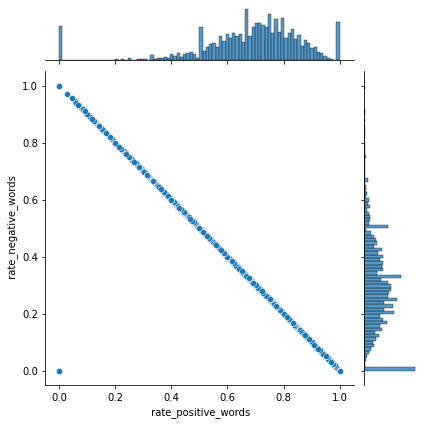

In [10]:
sns.jointplot(pdata[' rate_positive_words'],pdata[' rate_negative_words']);

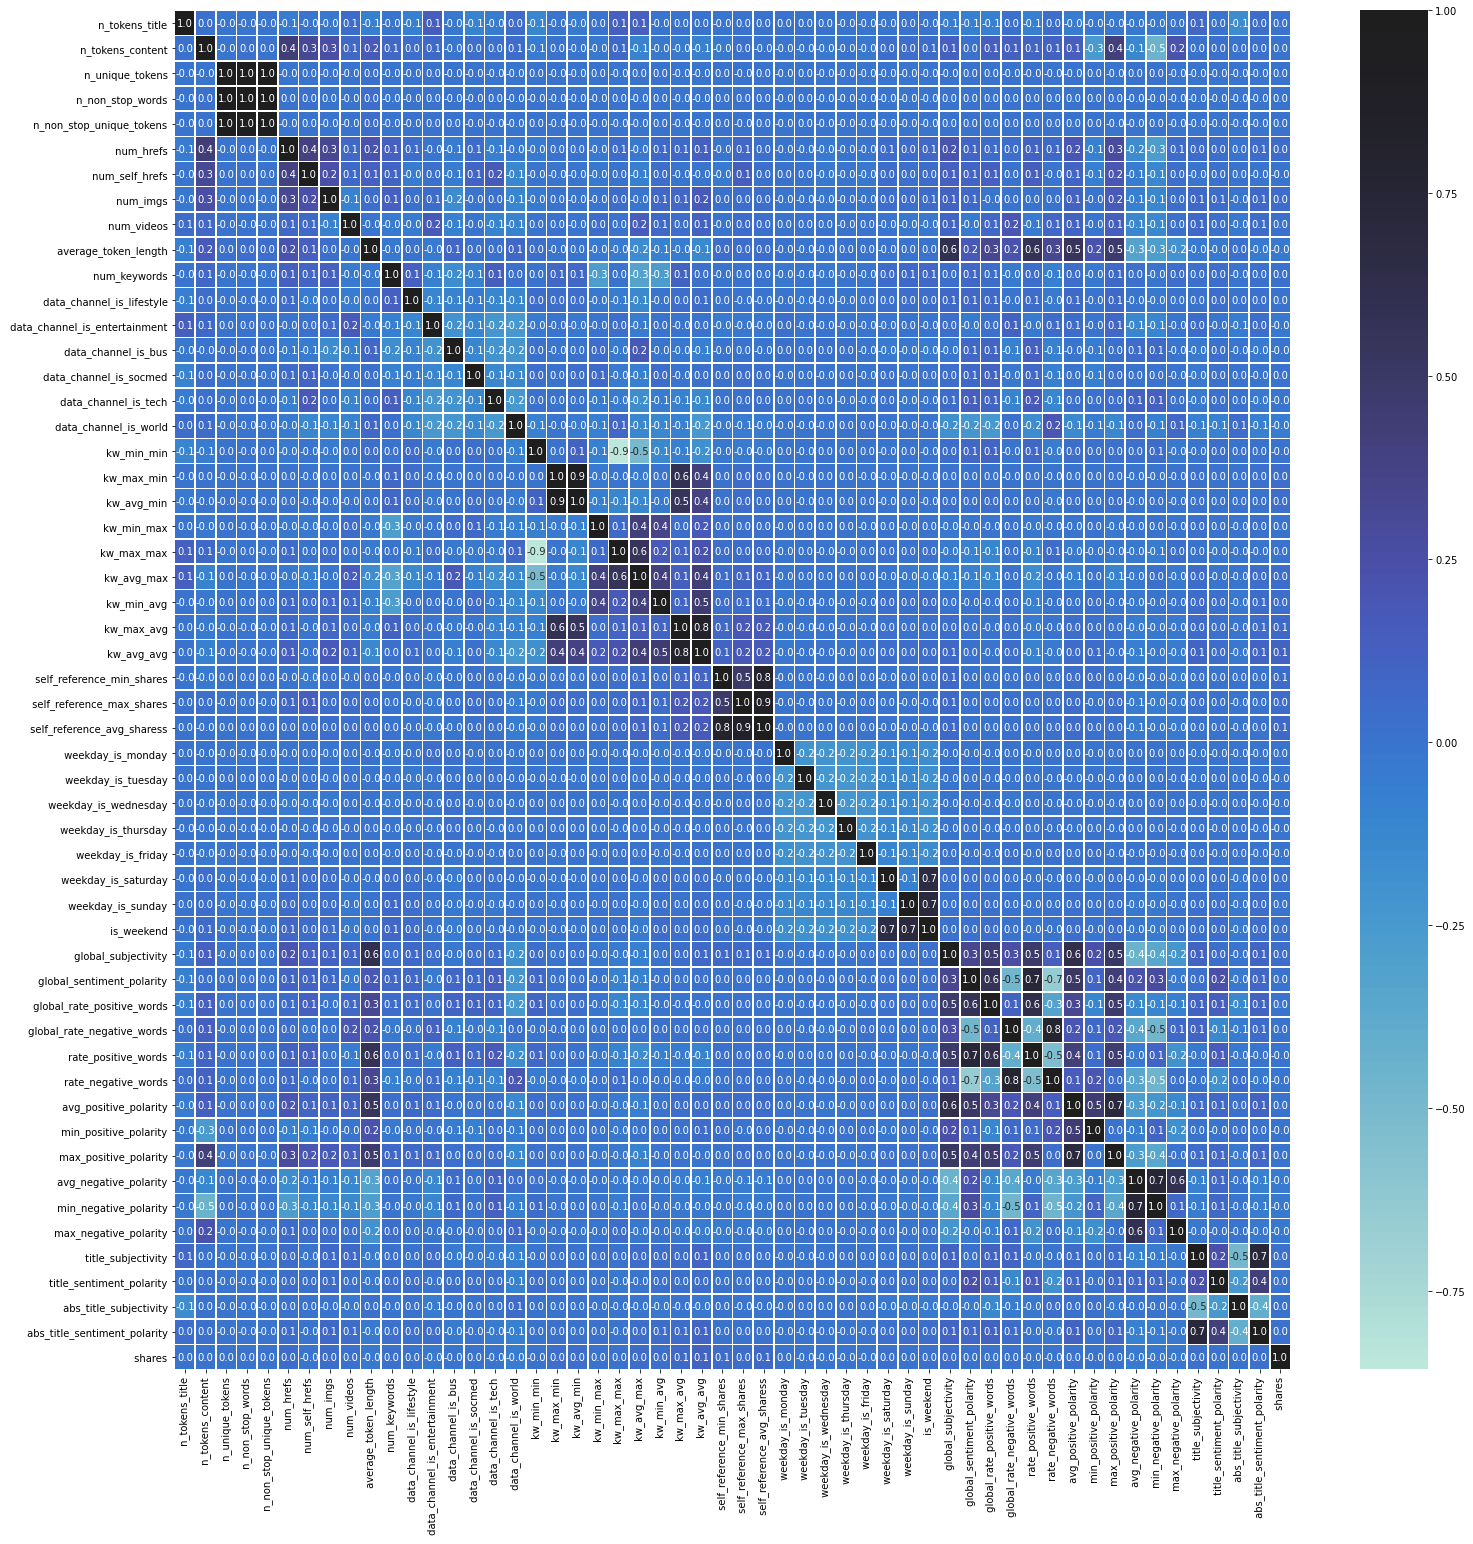

In [39]:
mydata = pdata.iloc[:, 1:55]
plt.figure(figsize=(25,25))
sns.heatmap(mydata.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

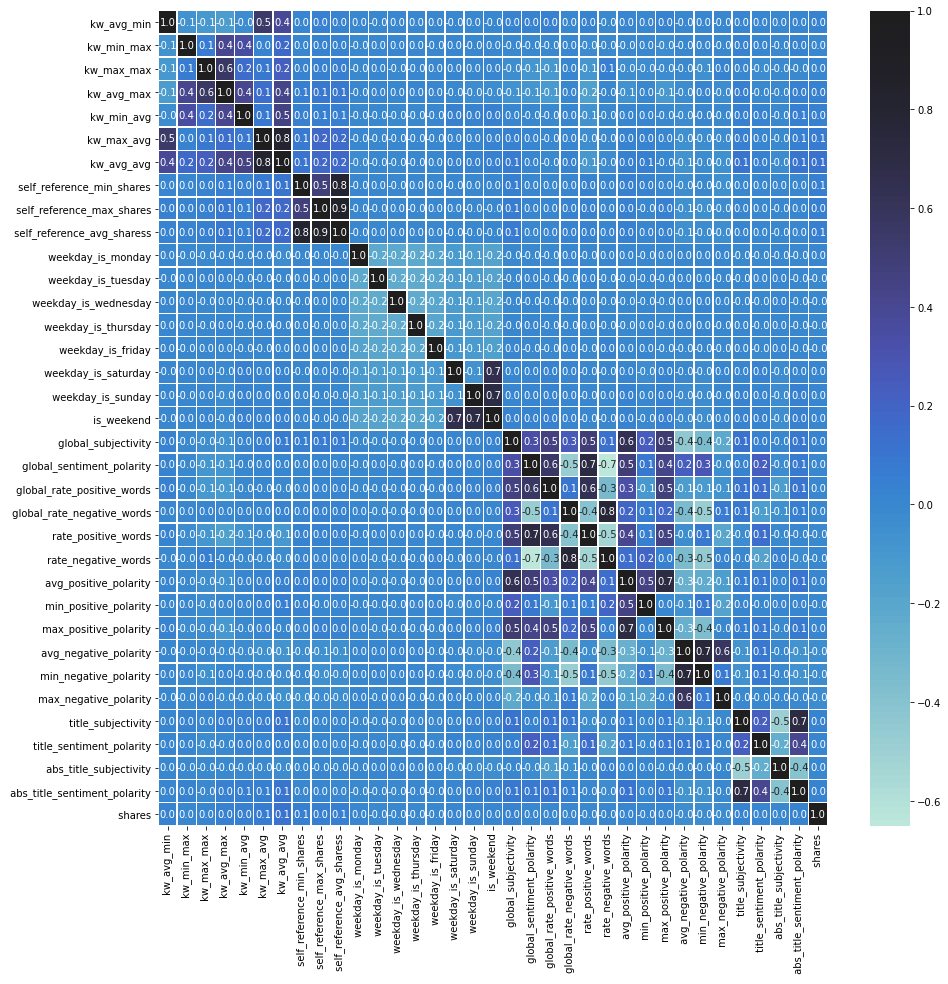

In [59]:
mydata = pdata.iloc[:, 20:55]
plt.figure(figsize=(15,15))
sns.heatmap(mydata.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [60]:
sns.corrplot(pdata,annot=True,sig_stars=True, diag_names=True)

AttributeError: module 'seaborn' has no attribute 'corrplot'